In [1]:
from Comparative_Analysis import Sequence_Analysis_Routines as sar
from Comparative_Analysis import Alignment_Analysis as alignment_analysis
import pickle
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
project_dir = 'D:/Project_Data/Project_3'
output_dir = project_dir + '/Output/Close_Species'
conservation_analysis_output_dir = output_dir + '/Conservation_Analysis_Output'

In [3]:
with open(conservation_analysis_output_dir + '/upstream_conservation_info_dictionary.pkl', 'rb') as f:
    upstream_conservation_info_dictionary = pickle.load(f)
with open(conservation_analysis_output_dir + '/downstream_conservation_info_dictionary.pkl', 'rb') as f:
    downstream_conservation_info_dictionary = pickle.load(f)

In [14]:
co_ordinates2 = widgets.IntRangeSlider(
    value=[5, 7],
    min=0,
    max=10,
    step=1,
    description='Co-ordinates',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

In [36]:
locus_tag2 = widgets.Dropdown(continuous_update = False, options=sorted(list(upstream_conservation_info_dictionary.keys())))
region2 = widgets.Dropdown(options=['Upstream', 'Downstream', 'Both'],continuous_update = False)
use_coordinates = widgets.Dropdown(options=['Y', 'N'],continuous_update = False)

In [51]:
def update_coordinates(groupid):
    co_ordinates2.min = -99999
    co_ordinates2.max = int(upstream_conservation_info_dictionary[groupid].end) 
    co_ordinates2.min = int(upstream_conservation_info_dictionary[groupid].start)
    co_ordinates2.value = [co_ordinates2.min, co_ordinates2.max]

In [52]:
#locus_tag2.observe(update_coordinates, 'value')
#locus_tag2.observe(show_gene)

In [53]:
def show_gene(region, locus_tag, coords, use_coords):
    if use_coords == 'N':
        x1 = -999; x2 = -999
    else:
        x1 = coords[0]; x2 = coords[1]
    if region == 'Upstream':
        upstream_conservation_info_dictionary[locus_tag].display_analysis(x1, x2)
    elif region == 'Downstream':
        downstream_conservation_info_dictionary[locus_tag].display_analysis(x1, x2)
    elif region == 'Both':
        upstream_conservation_info_dictionary[locus_tag].display_analysis()
        downstream_conservation_info_dictionary[locus_tag].display_analysis()

    update_coordinates(locus_tag)

In [54]:
_=interact_manual(show_gene,  region = region2, locus_tag = locus_tag2, coords = co_ordinates2, use_coords = use_coordinates)

interactive(children=(Dropdown(description='region', options=('Upstream', 'Downstream', 'Both'), value='Upstre…

In [50]:
int(upstream_conservation_info_dictionary['Rv0006'].start) 

7217

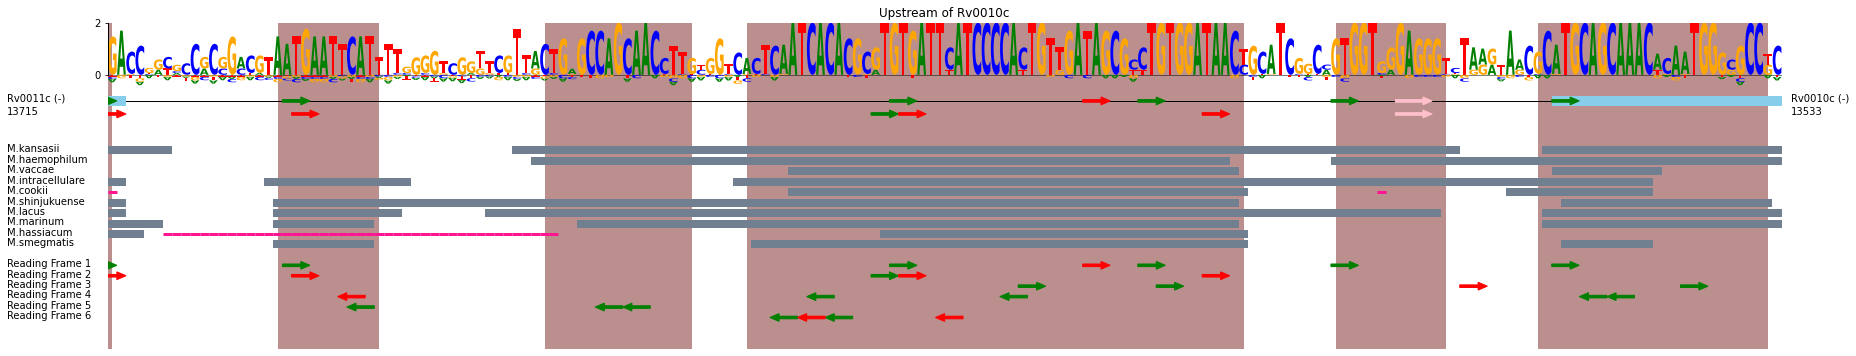

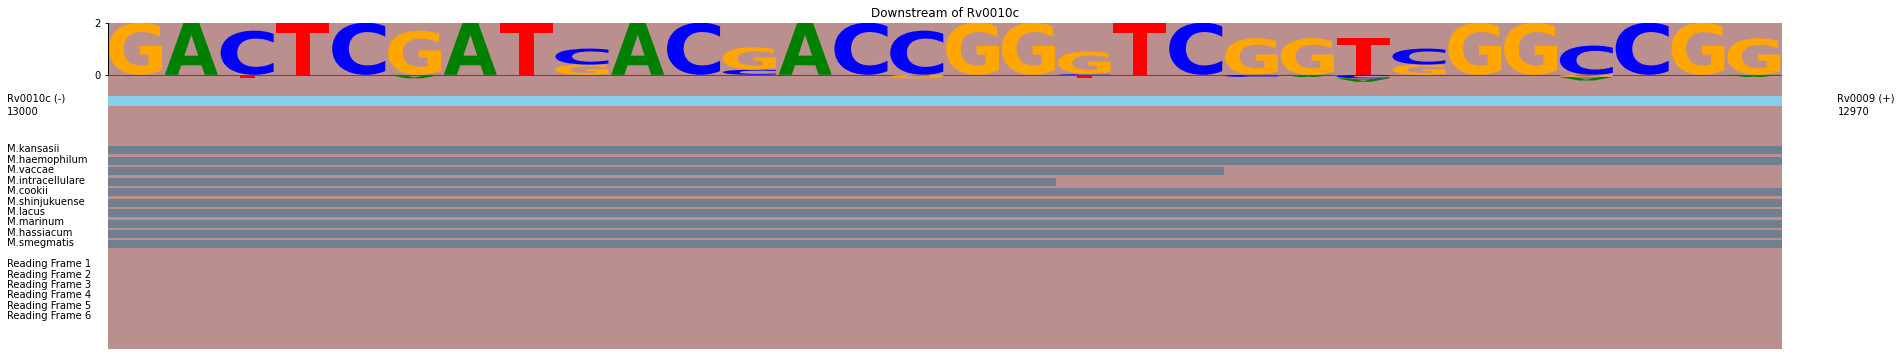

In [11]:
upstream_conservation_info_dictionary['Rv0010c'].display_analysis(13533, 13715)
downstream_conservation_info_dictionary['Rv0010c'].display_analysis(12970,13000)

In [ ]:
group_id = 839 #1161 #1337 1007 839    #use 1120 in slides!  Also 1115 is interesting to discuss    #1116 is interesting 
     #1120 can see the labels work!
    #1161 817 758 1337 1114 List of sRNA in Arnvig 2011          Rv2976a intervenes on third one
    #2131 not very well conserved in Arnvig 2011
    #1129
    #1169 shows upstream start in DeJesus
    #1214 massive!
    #1009 not much conservation
    # 993 definitely looks like an upstream start site for reverse strand??

In [ ]:
groupid = 'Rv0009'
print(int(upstream_conservation_info_dictionary[groupid].start))
print(int(upstream_conservation_info_dictionary[groupid].end))